In [1]:
import os

os.chdir("..")

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import json

import numpy as np
import matplotlib.pyplot as plt
import tqdm.auto as tqdm
from urbanstats.games.quiz_analysis import get_full_statistics, questions
from urbanstats.games.quiz import display_question, quiz_is_guaranteed_past, display_question

/home/kavi/anaconda3/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [4]:
plt.rcParams["font.family"] = "monospace"

In [5]:
result = get_full_statistics(after_problem=1, debug=False)
num_users_by_problem = result.groupby("problem").count().user_id
means = result[["problem", "score", *questions]].groupby("problem").mean()

In [6]:
problem = []
statvals = []
for i in means.index:
    with open(f"/home/kavi/temp/site/quiz/{i}") as f:
        x = json.load(f)
        problem.append(x)
    statvals.append(np.array([[x["stat_a"], x["stat_b"]] for x in x]))
statvals = np.array(statvals)

In [8]:
eases = 100 * np.array(means[["q1", "q2", "q3", "q4", "q5"]])

In [9]:
delta = np.array(np.abs(statvals[:,:,0] - statvals[:,:,1]) / np.abs(statvals).max(-1))

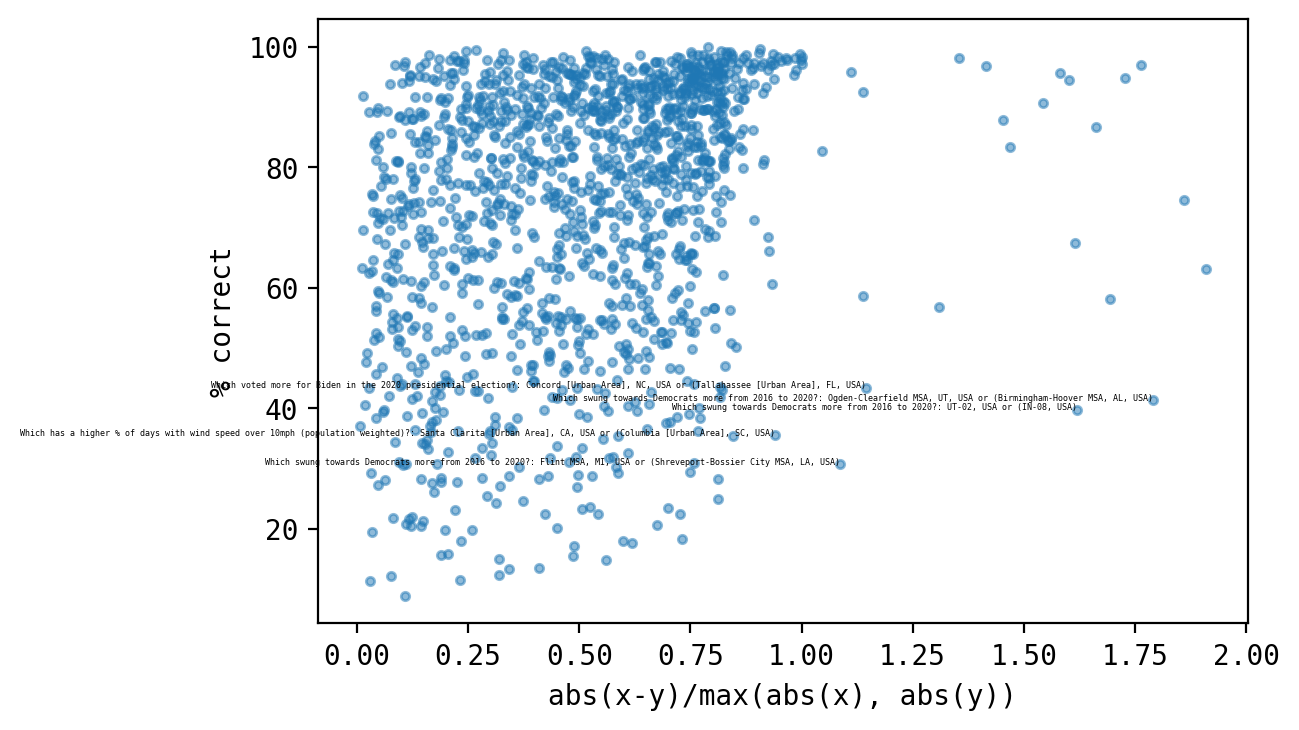

In [10]:
days, questions = np.where((eases < 50) & (delta > 0.9))
plt.figure(dpi=200, facecolor="white")
plt.scatter(delta.flatten(), eases.flatten(), marker=".", alpha=0.5)
plt.xlabel("abs(x-y)/max(abs(x), abs(y))")
plt.ylabel("% correct")
for d, q in zip(days, questions):
    quest = problem[d][q]
    la = quest["longname_a"]
    lb = quest["longname_b"]
    if quest["stat_a"] > quest["stat_b"]:
        la = f"({la})"
    else:
        lb = f"({lb})"
    quest = display_question(quest["question"]) + ": " + la + " or " + lb
    plt.text(delta[d,q], eases[d,q], quest, size=3, ha="right")